In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [12]:
df = pd.read_csv('c:/bd092_data/ozone.csv')
df.head()
df.info()
cat = df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


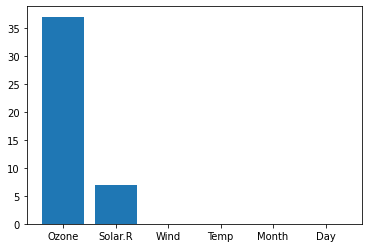

In [14]:
import matplotlib.pyplot as plt
plt.bar(cat.index, cat)
plt.show()

In [24]:
df.isnull().sum()
df1 = df[pd.notnull(df['Ozone'])]
df1.info()
df1 = df1[pd.notnull(df1['Solar.R'])]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  111 non-null    float64
 2   Wind     116 non-null    float64
 3   Temp     116 non-null    int64  
 4   Month    116 non-null    int64  
 5   Day      116 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 6.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    111 non-null    float64
 1   Solar.R  111 non-null    float64
 2   Wind     111 non-null    float64
 3   Temp     111 non-null    int64  
 4   Month    111 non-null    int64  
 5   Day      111 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 6.1 KB


In [26]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    111 non-null    float64
 1   Solar.R  111 non-null    float64
 2   Wind     111 non-null    float64
 3   Temp     111 non-null    int64  
 4   Month    111 non-null    int64  
 5   Day      111 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 6.1 KB


,Ozone,Solar.R,Wind,Temp,Month,Day
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,42.099099,184.801802,9.939640,77.792793,7.216216,15.945946
std,33.275969,91.152302,3.557713,9.529969,1.473434,8.707194
min,1.000000,7.000000,2.300000,57.000000,5.000000,1.000000
25%,18.000000,113.500000,7.400000,71.000000,6.000000,9.000000
50%,31.000000,207.000000,9.700000,79.000000,7.000000,16.000000
75%,62.000000,255.500000,11.500000,84.500000,9.000000,22.500000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [27]:
df1.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7


In [31]:
df.info()
df['Ozone'] = df['Ozone'].fillna(df['Ozone'].mean())
df['Solar.R'] = df['Solar.R'].fillna(df['Solar.R'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  153 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  153 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [33]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  153 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [46]:
df.head()
x = df.drop(['Ozone', 'Month', 'Day'], axis=1)
y = df['Ozone']
x
x1 = sm.add_constant(x, has_constant='add')
x1

,const,Solar.R,Wind,Temp
0,1.0,190.000000,7.4,67
1,1.0,118.000000,8.0,72
2,1.0,149.000000,12.6,74
3,1.0,313.000000,11.5,62
4,1.0,185.931507,14.3,56
...,...,...,...,...
148,1.0,193.000000,6.9,70
149,1.0,145.000000,13.2,77
150,1.0,191.000000,14.3,75
151,1.0,131.000000,8.0,76


In [48]:
multi_model = sm.OLS(y, x1).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     45.85
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           4.73e-21
Time:                        23:19:41   Log-Likelihood:                -680.14
No. Observations:                 153   AIC:                             1368.
Df Residuals:                     149   BIC:                             1380.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.2232     18.883     -2.024      0.045     -75.537      -0.909
Solar.R        0.0577      0.020      2.883      0.005       0.018       0.097
Wind          -2.7173      0.543     -5.006      0.000      -3.790      -1.645
Temp           1.2413      0.209      5.937      0.000       0.828       1.654
==============================================================================
Omnibus:                       50.473   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.388
Skew:                           1.378   Prob(JB):                     1.61e-27
Kurtosis:                       6.429   Cond. No.                     2.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

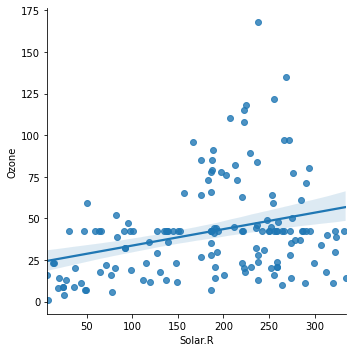

In [50]:
import seaborn as sns
sns.lmplot(x='Solar.R', y='Ozone', data=df)

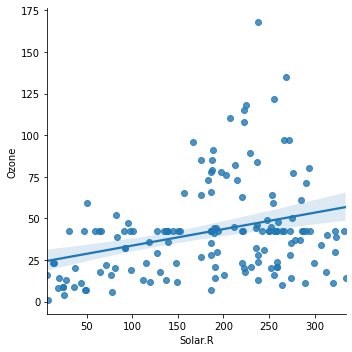

In [52]:
sns.lmplot(y='Ozone', x='Solar.R', data=df)

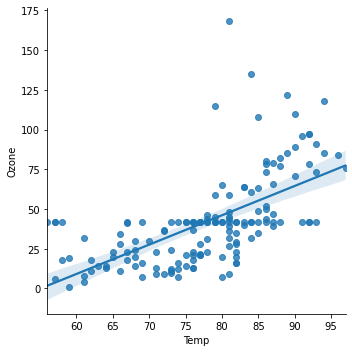

In [53]:
sns.lmplot(y='Ozone', x='Temp', data=df)

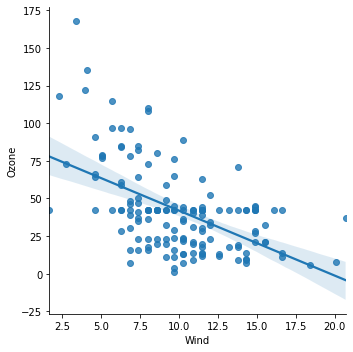

In [54]:
sns.lmplot(x='Wind', y='Ozone', data=df)

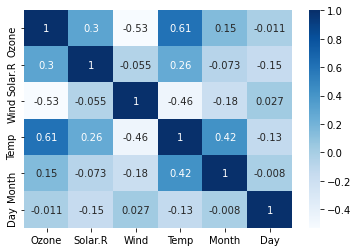

In [58]:
df.corr()
sns.heatmap(df.corr(), cmap='Blues' ,annot=True)

# 상관관계분석에서 Ozone과 일조량, 바람, 온도는 꽤 강한 상관관계가 발견됬다. 
# --> 다중회귀분석에서 Ozone과 일조량, 바람, 온도는 인과관계가 있었고, 제각각 오존에 영향 미쳤다. 그 중 바람이 오존에 제일 큰 영향을 미친다는
# 사실이 발견됬다. 
